In [39]:
from pyod.utils.data import generate_data
from pyod.models import ocsvm, deep_svdd
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [27]:
# Utils
def addAnomalySubplot(ax, X, y, title):
    ax.title.set_text(title)
    ax.scatter(
        X[y==0, 0],
        X[y==0, 1],
        X[y==0, 2], c='blue')
    ax.scatter(
        X[y==1, 0],
        X[y==1, 1],
        X[y==1, 2], c='red')

(300, 3)
OCSVM scores:
	BA:  1.0
	ROC AUC score:  1.0


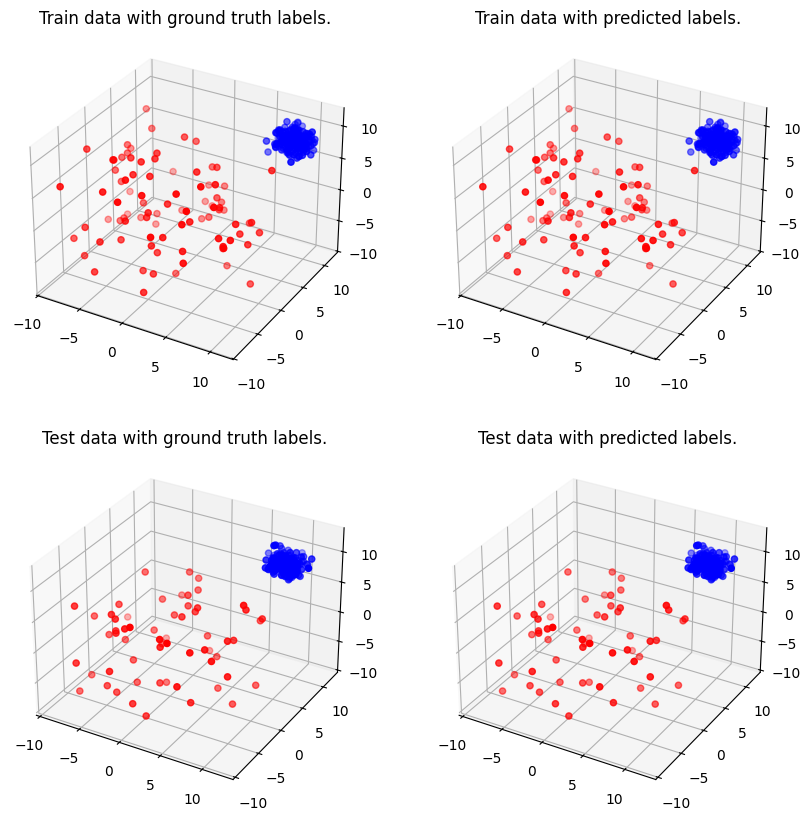

In [28]:
# Ex 1
contamination = 0.3
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=contamination)
print(X_train.shape)
model = ocsvm.OCSVM(kernel='linear', contamination=contamination)
model.fit(X_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

auc = roc_auc_score(y_test, y_test_pred)
ba = balanced_accuracy_score(y_test, y_test_pred)
print("OCSVM scores:")
print("\tBA: ", ba)
print("\tROC AUC score: ", auc)

fig = plt.figure(figsize=(10, 10))

addAnomalySubplot(fig.add_subplot(221, projection='3d'), X_train, y_train, "Train data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(222, projection='3d'), X_train, y_train_pred, "Train data with predicted labels.")
addAnomalySubplot(fig.add_subplot(223, projection='3d'), X_test, y_test, "Test data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(224, projection='3d'), X_test, y_test_pred, "Test data with predicted labels.")
plt.show()

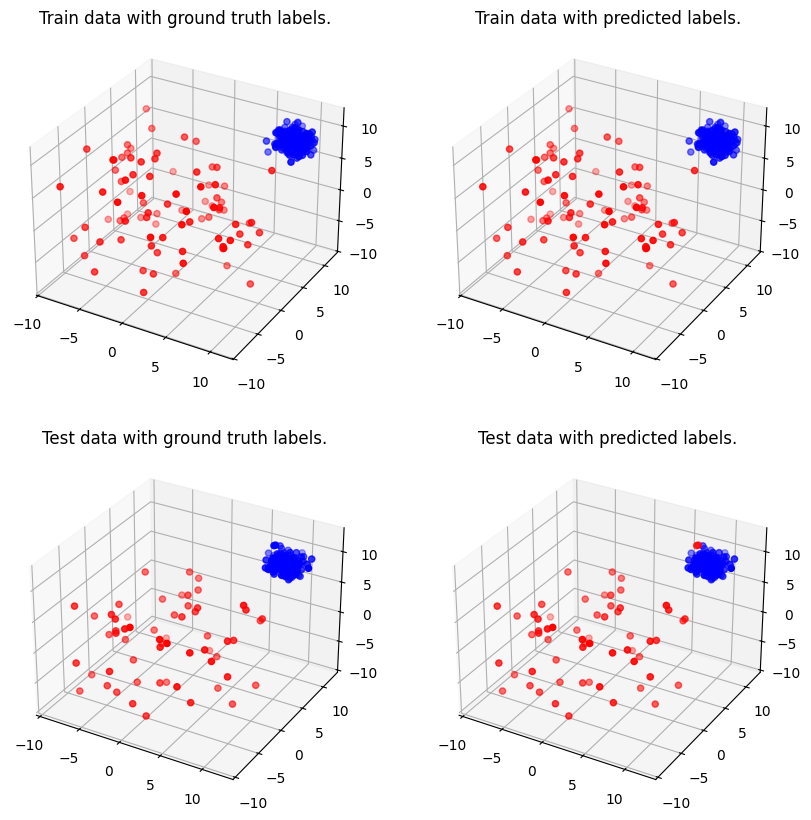

In [29]:
# Ex 1 - 4
model = ocsvm.OCSVM(kernel='rbf', contamination=contamination)
model.fit(X_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

fig = plt.figure(figsize=(10, 10))
addAnomalySubplot(fig.add_subplot(221, projection='3d'), X_train, y_train, "Train data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(222, projection='3d'), X_train, y_train_pred, "Train data with predicted labels.")
addAnomalySubplot(fig.add_subplot(223, projection='3d'), X_test, y_test, "Test data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(224, projection='3d'), X_test, y_test_pred, "Test data with predicted labels.")
plt.show()

Epoch 1/100, Loss: 6.767378926277161
Epoch 2/100, Loss: 6.511210262775421
Epoch 3/100, Loss: 6.378125041723251
Epoch 4/100, Loss: 6.502085298299789
Epoch 5/100, Loss: 6.59027224779129
Epoch 6/100, Loss: 6.5599313378334045
Epoch 7/100, Loss: 6.516287297010422
Epoch 8/100, Loss: 6.475046694278717
Epoch 9/100, Loss: 6.711910009384155
Epoch 10/100, Loss: 6.513015002012253
Epoch 11/100, Loss: 6.527491509914398
Epoch 12/100, Loss: 6.649067640304565
Epoch 13/100, Loss: 6.552566766738892
Epoch 14/100, Loss: 6.360793709754944
Epoch 15/100, Loss: 6.356477230787277
Epoch 16/100, Loss: 6.344611078500748
Epoch 17/100, Loss: 6.45940101146698
Epoch 18/100, Loss: 6.92437019944191
Epoch 19/100, Loss: 6.528869152069092
Epoch 20/100, Loss: 6.412209749221802
Epoch 21/100, Loss: 6.748314291238785
Epoch 22/100, Loss: 6.602262228727341
Epoch 23/100, Loss: 6.755999803543091
Epoch 24/100, Loss: 6.563471496105194
Epoch 25/100, Loss: 6.43523907661438
Epoch 26/100, Loss: 6.424038618803024
Epoch 27/100, Loss: 6.50

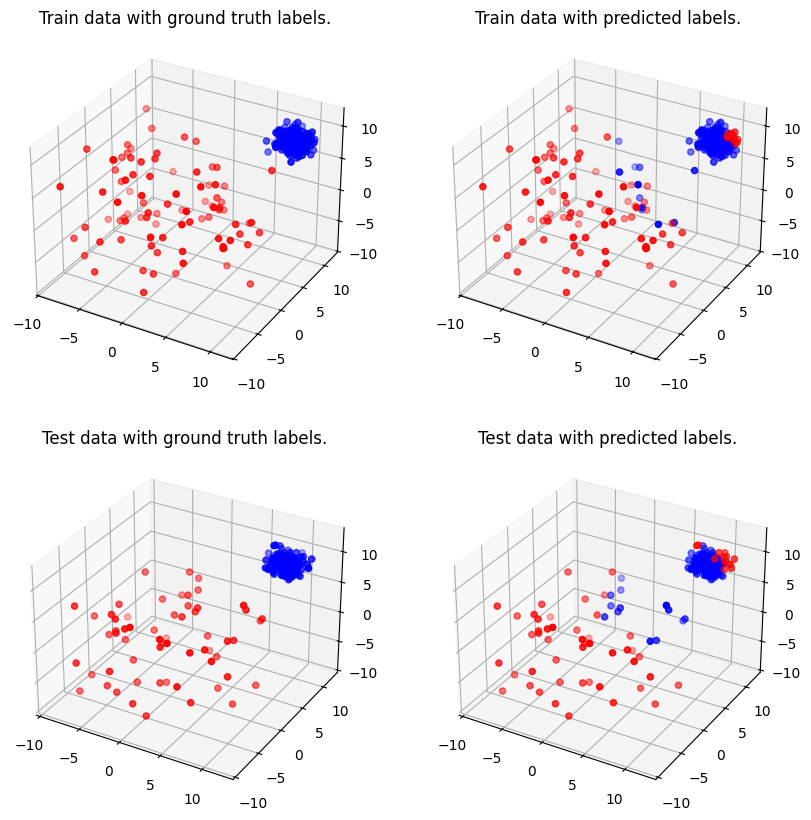

In [30]:
model = deep_svdd.DeepSVDD(contamination=contamination, n_features=3)
model.fit(X_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

auc = roc_auc_score(y_test, y_test_pred)
ba = balanced_accuracy_score(y_test, y_test_pred)
print("Deep SVDD scores:")
print("\tBA: ", ba)
print("\tROC AUC score: ", auc)

fig = plt.figure(figsize=(10, 10))
addAnomalySubplot(fig.add_subplot(221, projection='3d'), X_train, y_train, "Train data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(222, projection='3d'), X_train, y_train_pred, "Train data with predicted labels.")
addAnomalySubplot(fig.add_subplot(223, projection='3d'), X_test, y_test, "Test data with ground truth labels.")
addAnomalySubplot(fig.add_subplot(224, projection='3d'), X_test, y_test_pred, "Test data with predicted labels.")
plt.show()

In [70]:
# Ex 2
mat = loadmat('cardio')
mat['y'] = -(2 * np.astype(mat['y'], np.int8)) + 1
X_train, X_test, y_train, y_test = train_test_split(mat['X'], mat['y'], train_size=0.4)
param_grid = {
    'svm__nu': [1, 0.1, 0.5],
    'svm__gamma': [5, 1, 0.01],
    'svm__kernel': ['linear', 'rbf'],
}
def score(y_true, y_pred):
    ba = balanced_accuracy_score(y_true, y_pred)
    print("BA: ", ba)
    return ba

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.OneClassSVM()),
])
grid = GridSearchCV(pipeline, param_grid=param_grid, scoring=make_scorer(score), verbose=3)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END svm__gamma=5, svm__kernel=linear, svm__nu=1;, score=nan total time=   0.0s
[CV 2/5] END svm__gamma=5, svm__kernel=linear, svm__nu=1;, score=nan total time=   0.0s
[CV 3/5] END svm__gamma=5, svm__kernel=linear, svm__nu=1;, score=nan total time=   0.0s
[CV 4/5] END svm__gamma=5, svm__kernel=linear, svm__nu=1;, score=nan total time=   0.0s
[CV 5/5] END svm__gamma=5, svm__kernel=linear, svm__nu=1;, score=nan total time=   0.0s
BA:  0.421969696969697
[CV 1/5] END svm__gamma=5, svm__kernel=linear, svm__nu=0.1;, score=0.422 total time=   0.0s
BA:  0.40434160305343514
[CV 2/5] END svm__gamma=5, svm__kernel=linear, svm__nu=0.1;, score=0.404 total time=   0.0s
BA:  0.525497512437811
[CV 3/5] END svm__gamma=5, svm__kernel=linear, svm__nu=0.1;, score=0.525 total time=   0.0s
BA:  0.5471014492753623
[CV 4/5] END svm__gamma=5, svm__kernel=linear, svm__nu=0.1;, score=0.547 total time=   0.0s
BA:  0.5464285714285715
[CV 5/5] END

/Users/emperor-tomato-ketchup/work/uni/master/y1/s1/anomaly-detection/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emperor-tomato-ketchup/work/uni/master/y1/s1/anomaly-detection/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emperor-tomato-ketchup/work/uni/master/y1/s1/anomaly-detection/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, 

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', OneClassSVM())]),
             param_grid={'svm__gamma': [5, 1, 0.01],
                         'svm__kernel': ['linear', 'rbf'],
                         'svm__nu': [1, 0.1, 0.5]},
             scoring=make_scorer(score, response_method='predict'), verbose=3)

In [81]:
y_pred = grid.best_estimator_.predict(X_test)
best_estimator_params = grid.best_estimator_.get_params()
test_score = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
print("Best grid search score:\t", grid.best_score_)
print("Test set BA:\t\t", test_score)
for hyperparam in param_grid.keys():
    print(hyperparam, ":\t", best_estimator_params[hyperparam] , sep="")

Best grid search score:	 0.7752792238993823
Test set BA:		 0.7877263581488934
svm__nu:	0.5
svm__gamma:	0.01
svm__kernel:	rbf


In [ ]:
# Ex 3
mat = loadmat('shuttle')
# mat['y'] = -(2 * np.astype(mat['y'], np.int8)) + 1
X_train, X_test, y_train, y_test = train_test_split(mat['X'], mat['y'], train_size=0.5)

def evaluate_model(clf, clf_name):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])
    pipeline.fit(X_train)

    y_pred = pipeline.predict(X_test)
    ba = balanced_accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(clf_name, "BA:", ba)
    print(clf_name, "ROC:", auc)

In [97]:
# 3.2
evaluate_model(ocsvm.OCSVM(), "OCSVM")
evaluate_model(deep_svdd.DeepSVDD(X_train.shape[1]), "Deep SVDD")

OCSVM BA: 0.9702097810016008
OCSVM ROC: 0.9702097810016008
Epoch 1/100, Loss: 686.6350035965443
Epoch 2/100, Loss: 686.2252508401871
Epoch 3/100, Loss: 687.8745854198933
Epoch 4/100, Loss: 686.4676349908113
Epoch 5/100, Loss: 686.2207784950733
Epoch 6/100, Loss: 686.5343781560659
Epoch 7/100, Loss: 686.2647742331028
Epoch 8/100, Loss: 686.1623494029045
Epoch 9/100, Loss: 686.0594328790903
Epoch 10/100, Loss: 687.678857922554
Epoch 11/100, Loss: 686.5848221033812
Epoch 12/100, Loss: 686.1834737211466
Epoch 13/100, Loss: 686.0647997707129
Epoch 14/100, Loss: 686.1833030879498
Epoch 15/100, Loss: 686.1025276482105
Epoch 16/100, Loss: 686.3225367665291
Epoch 17/100, Loss: 686.094769090414
Epoch 18/100, Loss: 687.5743909329176
Epoch 19/100, Loss: 686.1670601516962
Epoch 20/100, Loss: 686.1932634115219
Epoch 21/100, Loss: 686.1323489993811
Epoch 22/100, Loss: 686.1919091045856
Epoch 23/100, Loss: 686.7943091988564
Epoch 24/100, Loss: 686.1003872007132
Epoch 25/100, Loss: 686.1312955915928
Ep

In [ ]:
# 3.3 
architectures = [
    [128, 64, 32, 16, 8],
    [1024, 256, 64, 16, 4],
    [1024, 512, 128, 64, 32],
    [2048, 1024, 512, 128, 64],
]

for architecture in architectures:
    clf = deep_svdd.DeepSVDD(X_train.shape[1], hidden_neurons=architecture, verbose=0)
    evaluate_model(clf, architecture)

Epoch 1/100, Loss: 4.672521697008051
Epoch 2/100, Loss: 4.441294425632805
Epoch 3/100, Loss: 4.46391054824926
Epoch 4/100, Loss: 4.623465303564444
Epoch 5/100, Loss: 4.352618242963217
Epoch 6/100, Loss: 4.558571430388838
Epoch 7/100, Loss: 4.796607578871772
Epoch 8/100, Loss: 4.519465054501779
Epoch 9/100, Loss: 4.761366902268492
Epoch 10/100, Loss: 4.689650576678105
Epoch 11/100, Loss: 4.715223465929739
Epoch 12/100, Loss: 4.556447175098583
Epoch 13/100, Loss: 4.643504441599362
Epoch 14/100, Loss: 4.9709845600882545
Epoch 15/100, Loss: 4.624476844561286
Epoch 16/100, Loss: 4.849287263234146
Epoch 17/100, Loss: 4.706036402843893
Epoch 18/100, Loss: 4.7533805693965405
Epoch 19/100, Loss: 4.783979171072133
Epoch 20/100, Loss: 4.579773505683988
Epoch 21/100, Loss: 4.8356052447343245
Epoch 22/100, Loss: 4.470084240543656
Epoch 23/100, Loss: 4.817273829365149
Epoch 24/100, Loss: 4.370450610062107
Epoch 25/100, Loss: 4.742870846064761
Epoch 26/100, Loss: 4.991155372466892
Epoch 27/100, Loss: